In [16]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#importing database
df=pd.read_csv(r'/Users/sushmitashekhawat/Downloads/video_id_info.csv',on_bad_lines='skip')

In [16]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
## lets find out missing values in your data
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [10]:
## drop missing values as we have very few & lets update dataframe as well..
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [ ]:
### Perform Sentiment Analysis
#Sentiment analysis is a way for computers to understand and analyze the emotions expressed in text, like whether it's positive, negative, or neutral.
#eg.
# 1)This video is quite helpful-->Positive sentiment [0,1] more it will close to 1 it will positve sentiment 
# 2)Uable to understand the topic -->Negative sentiment[-1]
# 3) I'm attending the lecture this afternoon.-->Neutral sentiment[0]

#The polarity range refers to the scale used in sentiment analysis to measure the degree of positivity or negativity in text, typically ranging from -1 to 1

In [13]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks 
#!pip install textblob
import sys #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.1 MB/s eta 0:00:00a 0:00:01


In [14]:
from textblob import TextBlob

In [15]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [17]:
df.shape

(691374, 4)

In [18]:
#creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).
#This can be useful for working with a smaller subset of data, such as when you want to perform quick analyses or tests without using the entire dataset.

sample_df = df[0:1000]

In [19]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [20]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [21]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [ ]:
#performing sentiment for each row of comment_text'
#polarity = []--black list

#for comment in df['comment_text']:
    #TextBlob(comment).sentiment.polarity
    #polarity.append(TextBlob(comment).sentiment.polarity)

#if there is black txt then will get the exception error . so avoid the exception we have to use try exception block

#syntax 
#try:
    # Code that might raise an exception
# except :
    # Code to handle the exception


In [23]:
polarity=[]

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [24]:
len(polarity)

691374

In [25]:
df['polarity']=polarity
### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [26]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [ ]:
##  Wordcloud Analysis of your data



In [ ]:
#Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset

In [28]:
filter1=df['polarity']==1
comments_positive=df[filter1]

In [59]:
filter2 = df['polarity']==-1
comments_negative= df[filter2]

In [29]:
#!pip install wordcloud
import sys 
!{sys.executable} -m pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [32]:
from wordcloud import WordCloud, STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [35]:
set(STOPWORDS)
#turns the stopwords list into a unique collection of words for faster processing.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [36]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [37]:
type(df['comment_text'])

pandas.core.series.Series

In [39]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.

total_comments_positive = ''.join(comments_positive['comment_text'])

In [40]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words that don't carry significant meaning.

(-0.5, 399.5, 199.5, -0.5)

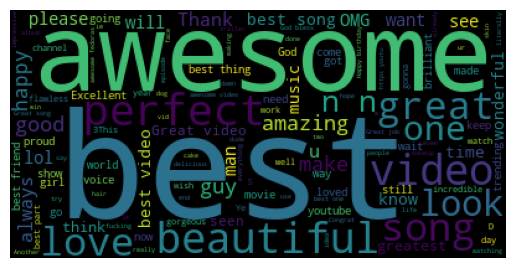

In [47]:
plt.imshow(wordcloud)
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library. 
plt.axis('off')

In [ ]:
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [60]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [61]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

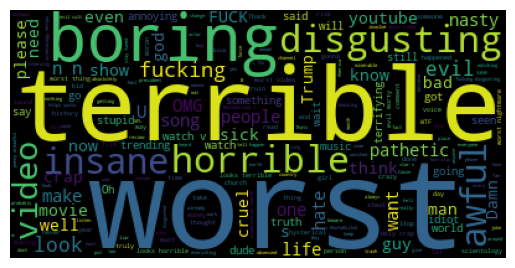

In [62]:
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

In [ ]:
##  Perform Emoji's Analysis

In [63]:
#!pip install emoji==2.10.1
import sys 
!{sys.executable} -m pip install emoji==2.10.1 
## 2.10.0 is a most stable version till date , hence installing this version makes sense !

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 1.3 MB/s eta 0:00:00a 0:00:01m


In [9]:
import emoji

In [66]:
emoji.__version__

'2.10.1'

In [5]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [7]:
comment = 'trending 😉'

In [10]:
[char for char in comment if char in emoji.EMOJI_DATA]

#The code snippet you provided is a list comprehension that filters out characters from a string (comment) if they are present in the emoji.
#EMOJI_DATA dictionary. It's a way to extract emojis from a text string.

['😉']

In [13]:
all_emojis_list = []

for comment in df['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [17]:
all_emojis_list[0:10] #first 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
### Now we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [19]:
from collections import Counter #collection package

In [26]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [16]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [28]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [18]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [30]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [20]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [22]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [23]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [27]:
import plotly.io as pio
pio.renderers.default='iframe_connected'

In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot
#use this if your chart is not displaying 
#Plotly is configured to display plots correctly.

In [30]:
trace=go.Bar(x=emojis, y=freqs)

In [31]:
iplot([trace])

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding


In [ ]:
##  Collect Entire data of Youtube !

In [5]:
import os

In [9]:
files=os.listdir(r'/Users/sushmitashekhawat/Desktop/Python_youtube_Analysis-master/YT_additional_data')

In [8]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'README.md',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [12]:
## extracting csv files only from above list

files_csv = [file for file in files if '.csv' in file]
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [13]:
#while colllecting the data if you encounter any kind of warning its always good to consider a warning modules.
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [20]:
#all the csv file i have to store in big data frame
full_df = pd.DataFrame()
path=r'/Users/sushmitashekhawat/Desktop/Python_youtube_Analysis-master/YT_additional_data'
for file in files_csv:
    current_df=pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df=pd.concat([full_df, current_df], ignore_index=True)

In [21]:
full_df.shape  #returns dimensions of the dataframe

(375942, 16)

In [22]:
full_df.duplicated() # "True" will represent duplicated rows and "False" will represent unique rows

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [23]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [25]:
full_df= full_df.drop_duplicates()

In [26]:
full_df.shape

(339525, 16)

In [32]:
## A. Storing data into csv
full_df[0:1000].to_csv(r'/Users/sushmitashekhawat/Desktop/Youtube_Data_Analysis/youtube_sample.csv', index=False)

In [33]:
## B. Storing data into json
full_df[0:1000].to_json(r'/Users/sushmitashekhawat/Desktop/Youtube_Data_Analysis/youtube_sample.json')

In [ ]:
##  Which Category has the maximum likes ?



In [34]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [35]:
full_df['category_id'].unique() #returns an array of category_ids that are unique

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [39]:
## lets read in json
json_df = pd.read_json(r'/Users/sushmitashekhawat/Desktop/Youtube_Data_Analysis/YT_additional_data/US_category_id.json')

In [40]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [41]:
json_df['items'][0] # retrives first item at 0th index from the database

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [45]:
# now I want id and title in a dictionary

cat_dict = {} # empty dictionary

for item in json_df['items'].values: # values here return the array representation of items
    ##cat_dict[key] = value
    cat_dict[int(item['id'])] = item['snippet']['title'] #snippet here is sub dict
    

In [46]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [48]:
full_df['category_name']=full_df['category_id'].map(cat_dict)
full_df['category_name']

0           Entertainment
1          People & Blogs
2         News & Politics
3         News & Politics
4           Howto & Style
               ...       
375937              Music
375938              Music
375939              Music
375940      Entertainment
375941              Music
Name: category_name, Length: 339525, dtype: object

In [49]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics


In [ ]:
#which category has the maximum likes ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

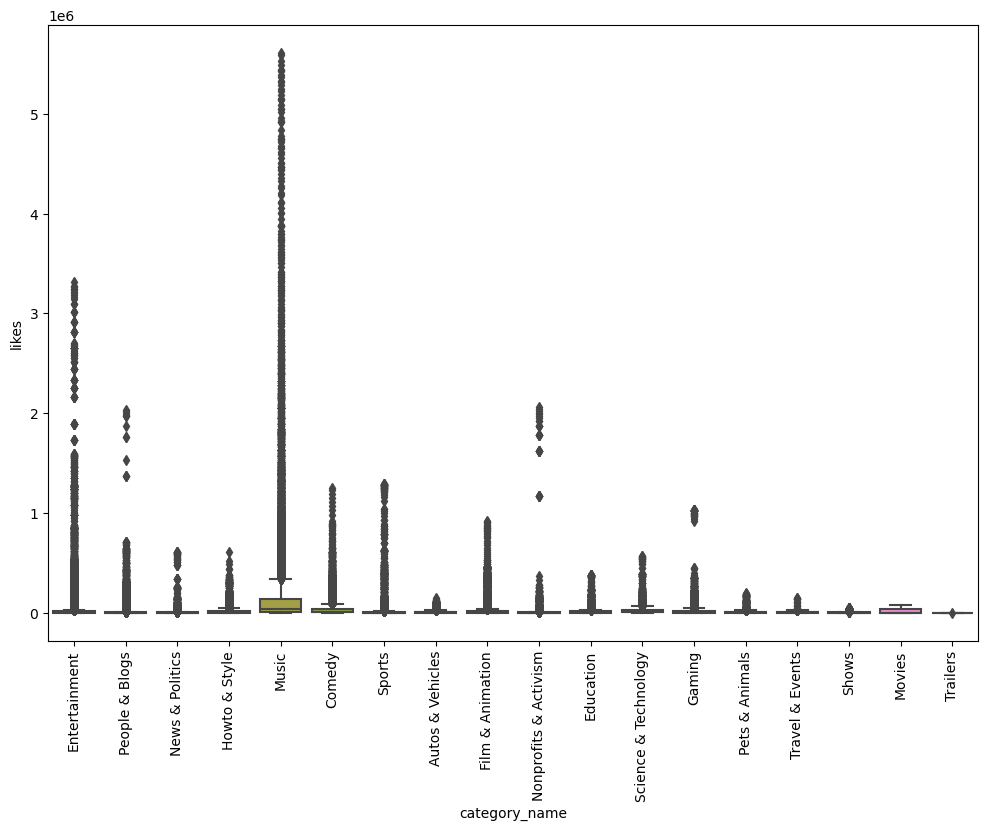

In [54]:
plt.figure(figsize=(12,8)) # creates a new figure of specified size
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical') # rotates x-axis vertically for better visualisation

In [ ]:
## Find out whether audience is engaged or not
like rate ,dislike , comment_count_rate

In [62]:
(full_df['likes']/full_df['views'])*100

0          1.348467
1          0.258164
2          7.426652
3          0.393123
4         11.557009
            ...    
375937     1.069488
375938     4.154752
375939     1.332022
375940     1.060729
375941     3.007315
Length: 339525, dtype: float64

In [60]:
full_df['likes_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate']= (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [61]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'likes_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [ ]:
#creating box plot
plt.figure(figsize=[12,8])
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
### Analysing relationship between views & likes


<Axes: xlabel='views', ylabel='likes'>

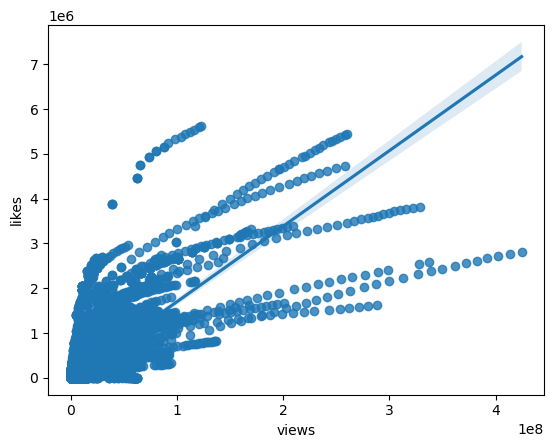

In [65]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views', y='likes', data=full_df)

In [66]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'likes_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [67]:
full_df[['views','likes','dislikes']]

,views,likes,dislikes
0,310130,4182,361
1,104972,271,174
2,136064,10105,266
3,96153,378,171
4,499965,57781,681
...,...,...,...
375937,25066952,268088,12783
375938,1492219,61998,13781
375939,29641412,394830,8892
375940,14317515,151870,45875


In [68]:
full_df[['views','likes','dislikes']].corr() # find co-relation between the given values

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

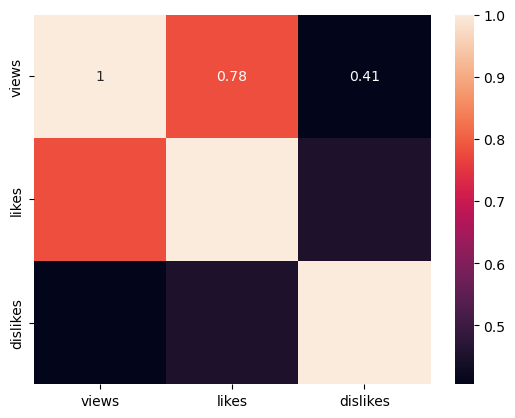

In [70]:
#now if you want to portray correlation, I am using heatmaps
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot=True)
#When annot=True, numerical values are displayed on the heatmap cells

In [71]:
##  Which channels have the largest number of trending videos?

In [72]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10,2017-11-12T20:17:38.000Z,[none],129645,506,67,239,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,False,False,False,Un fuerte sismo ha afectado en la noche de est...,Music,0.390297,0.051680,0.184350


In [74]:
full_df['channel_title'].value_counts() 
# returns the count of unique values in a Series, providing a frequency distribution of the values.

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

In [76]:
### lets obtain above frequency table using groupby approach :
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [77]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

#reset_index() is a pandas DataFrame method used to reset the index of a DataFrame. 
#It converts the index labels into a new column and assigns a default numeric index to the DataFrame.

In [78]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [80]:
cdf = cdf.rename(columns={0:'total_videos'})

In [81]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [82]:
import plotly.express as px

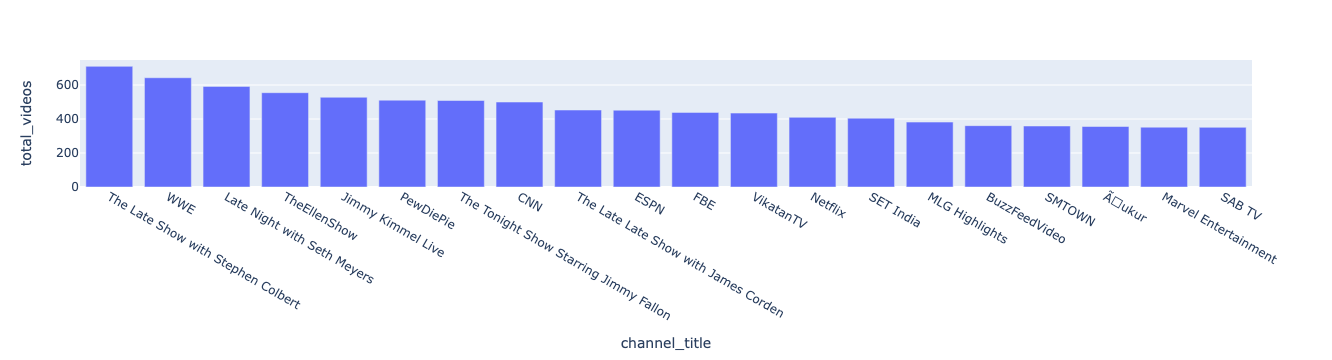

In [84]:
px.bar(data_frame=cdf[0:20], x = 'channel_title', y = 'total_videos')